# Baby Names from 1880-2010

This is an analysis of the data provided by the United States Social Security Administration. The data details the frequency of baby names from 1880 to present day. The project provided experience with data wrangling to load the dataset in the proper format, exposure to troubleshooting and common problems working with large data sets, and exploration of time series analysis. If there are any questions or concerns the author may be contacted to discuss analysis and methodology.

In [1134]:
# Start with imports
from numpy import *
from matplotlib import * 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

To preview one of the text file's data, read the file using the .read_csv() function. Set the column titles to: name, sex, and births.

In [1137]:
names1880 = pd.read_csv('yob1880.txt', names=['name', 'sex', 'births'])

In [1138]:
# Preview the data:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


To view the total births for that year group the data by sex, and then utilize the .sum() function.

In [1142]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

Merge all of the text files into one file. Make sure to add a column to account for each of the different birth years in the dataset. At the end of the code block, make sure to concatenate everything into a single DataFrame (and it does so row-wise).

In [1144]:
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
    names = pd.concat(pieces, ignore_index=True)

In [1146]:
# Preview the data 
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


We need to aggregate the data by year and gender, to do that we will use python's .pivot_table() function. Our index will be the year and the columns will dictate the gender of the baby.

In [1150]:
total_births = names.pivot_table('births', 
                                 index='year', 
                                 columns='sex', 
                                 aggfunc='sum')

In [1152]:
# Preview the latter part of the data: 
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


Let's visualize the data that we have wrangled so far:

<Axes: title={'center': 'Total births by sex and year'}, xlabel='year'>

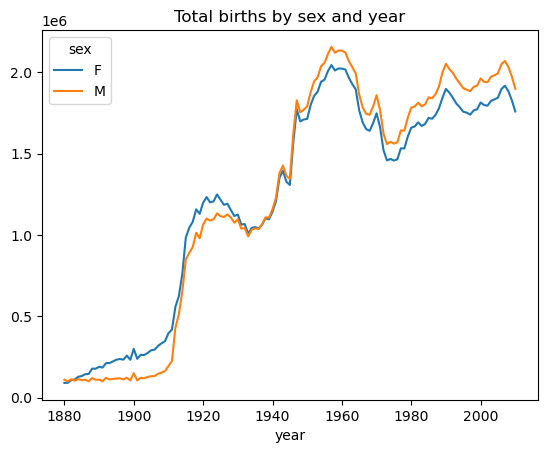

In [1155]:
total_births.plot(title="Total births by sex and year")

Next manipulate the data by grouping it by year and sex, add adding a column to track the proportion of babies given certain name relative to number of births.

In [1158]:
def add_prop(group):
    # Integer division floors 
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

Two things to note: make sure to reset the index prior to grouping the data due to a depreciation warming. Furthermore, for the .apply() function make sure to include a False include_groups due to a depreciation warning. At the time of this analysis there were changes to python that threw deprecation warnings. The code was updated to account for that and to refactor the code:

In [1161]:
names = names.groupby(['year', 'sex']).apply(add_prop, include_groups=False)

In [1163]:
# Preview the data
names

name  births      prop
year sex                                     
1880 F   0             Mary    7065  0.077643
         1             Anna    2604  0.028618
         2             Emma    2003  0.022013
         3        Elizabeth    1939  0.021309
         4           Minnie    1746  0.019188
...                     ...     ...       ...
2010 M   1690779    Zymaire       5  0.000003
         1690780     Zyonne       5  0.000003
         1690781  Zyquarius       5  0.000003
         1690782      Zyran       5  0.000003
         1690783      Zzyzx       5  0.000003

[1690784 rows x 3 columns]

Due to the large format of the dataset, perform a sanity check when executing group operations. We need to verify that the `prop` column sums to 1 for all groups. 

In [1166]:
# names.groupby(['year', 'sex']).prop.sum()
np.allclose(names.groupby(level=['year','sex']).prop.sum(),1)

True

Next, define a function that extracts the top 1000 names (for each sex and year) by performing another group operation: 

In [1169]:
def get_top1000(group):
    return group.sort_values('births', ascending=False)[:1000]
    
# Group the data by year and sex   
grouped = names.groupby(['year', 'sex'])

# Apply the function and reset the index with drop=True to avoid duplicate columns
top1000 = grouped.apply(get_top1000).reset_index(drop=True)

# Preview the data 
top1000

,name,births,prop
0,Mary,7065,0.077643
1,Anna,2604,0.028618
2,Emma,2003,0.022013
3,Elizabeth,1939,0.021309
4,Minnie,1746,0.019188
...,...,...,...
261872,Jaydan,194,0.000102
261873,Bailey,194,0.000102
261874,Destin,194,0.000102
261875,Camilo,194,0.000102


## Analyzing Naming Trends
Prepare our analysis of naming trends by splitting the top 1000 names into assigned genders. We begin by first resetting the index for the names. This preserves all the information that was in the index structure before further manipulating the data. Finally, we can filter the data by gender and preview the data before moving on:

In [1176]:
# Reset the index to convert the multi-index into columns
top1000 = names.reset_index()

# Now we can properly filter by sex
#boys = top1000[top1000['sex'] == 'M']
#girls = top1000[top1000['sex'] == 'F']

boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

# Display first few rows of each to verify the split
print("\nFirst few boy names:")
print(boys.head())
print("\nFirst few girl names:")
print(girls.head())


First few boy names:
     year sex  level_2     name  births      prop
942  1880   M      942     John    9655  0.087381
943  1880   M      943  William    9533  0.086277
944  1880   M      944    James    5927  0.053641
945  1880   M      945  Charles    5348  0.048401
946  1880   M      946   George    5126  0.046392

First few girl names:
   year sex  level_2       name  births      prop
0  1880   F        0       Mary    7065  0.077643
1  1880   F        1       Anna    2604  0.028618
2  1880   F        2       Emma    2003  0.022013
3  1880   F        3  Elizabeth    1939  0.021309
4  1880   F        4     Minnie    1746  0.019188


A simple time series is plotted with a pivot table of the total number of births by year and names. A bit of effort is needed to implement extra code to perform a bit of data munging. First we need both year and sex as index, so we start by resetting the index if 'year' is already an index:

In [1179]:
top1000 = top1000.reset_index(drop=True) if 'year' in top1000.index.names else top1000

Next, we create the pivot table with the following requirements:
- The births need to be aggregated as the values
- Year and sex are declared as the index
- Set name as the columns
- Declare the aggregate function as sum

In [1184]:
total_births = top1000.pivot_table(values='births', 
                                   index=['year'], 
                                   columns='name', 
                                   aggfunc='sum')

Display the graph:

In [1186]:
total_births

name,Aaban,Aabid,Aabriella,Aadam,Aadan,Aadarsh,Aaden,Aadesh,Aadhav,Aadhavan,...,Zyrus,Zysean,Zyshaun,Zyshawn,Zyshon,Zyshonne,Zytavious,Zyvion,Zyyanna,Zzyzx
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,NaN,NaN,9.0,NaN,14.0,55.0,NaN,5.0,NaN,...,NaN,NaN,5.0,5.0,NaN,NaN,7.0,NaN,NaN,NaN
2007,5.0,NaN,NaN,8.0,8.0,13.0,155.0,NaN,NaN,NaN,...,NaN,NaN,7.0,11.0,NaN,NaN,6.0,NaN,NaN,NaN
2008,NaN,NaN,5.0,6.0,22.0,13.0,955.0,NaN,NaN,NaN,...,9.0,NaN,6.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN


Print a concise summary of the dataframe. Make sure to include information on the index, column, and plot the data for a handful of names.

In [1190]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1880 to 2010
Columns: 88496 entries, Aaban to Zzyzx
dtypes: float64(88496)
memory usage: 88.4 MB


In [1192]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

Preview the data:

array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

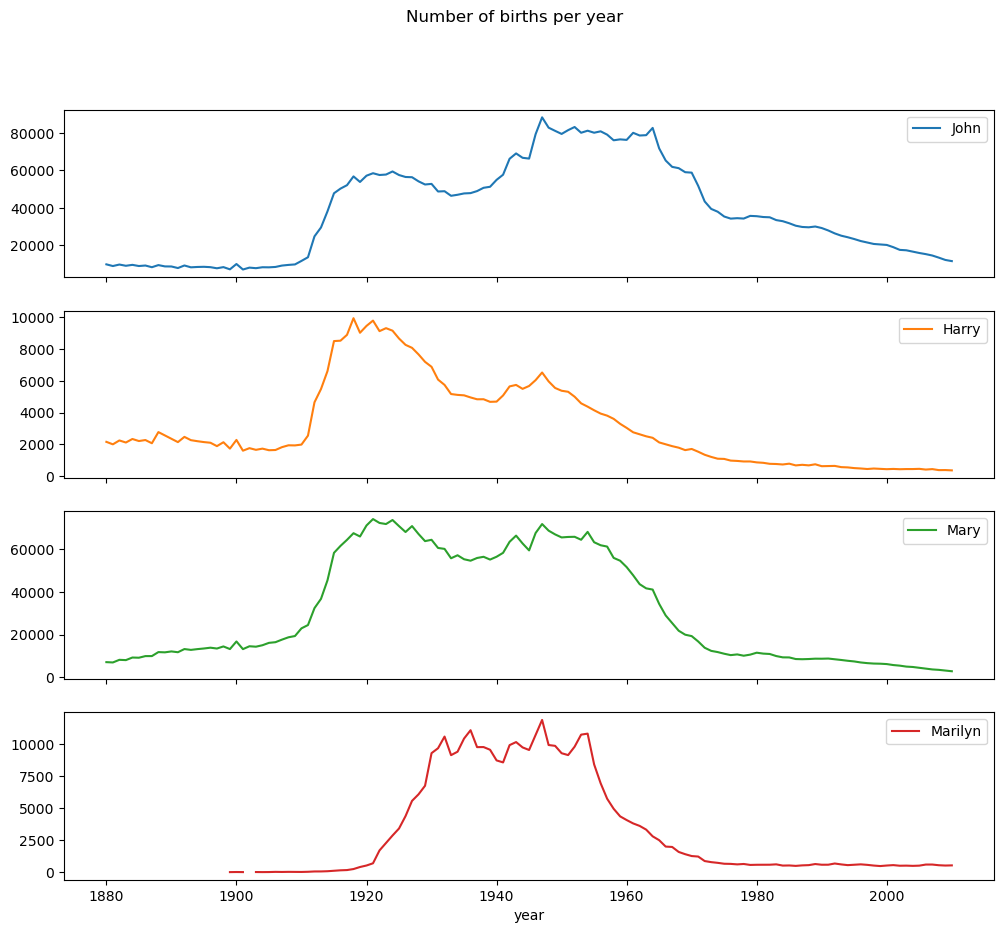

In [1195]:
subset.plot(subplots=True, 
            figsize=(12, 10), 
            grid=False, 
            title='Number of births per year')

## Measuring the increase in naming diversity
We notice in the plots that there is a severe drop off on the number of names. Let's explore the hypthesis that fewer parents were choosing common names for their children. For instance, let's analyze the name Allison:

In [1198]:
subseta = total_births[['Alison']]

<Axes: title={'center': 'Decrease of Popularity of the Name: Alison'}, xlabel='year'>

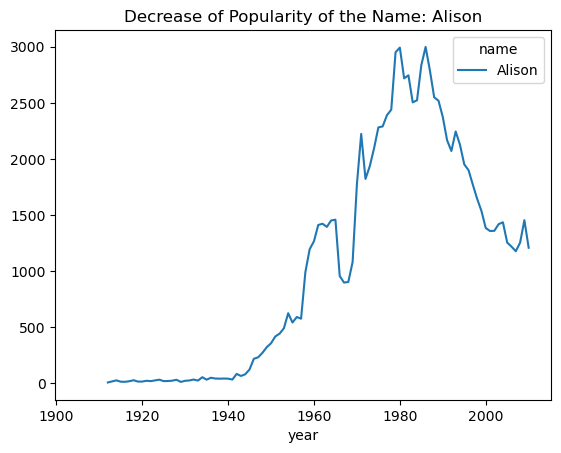

In [1200]:
subseta.plot(title='Decrease of Popularity of the Name: Alison')

To measure the increase in naming diversity create a pivot table where: 
- The values are declared as the variable prop.
- The index is set to year.
- Declare the columns as sex.
- The aggregate function is declared as sum.

<Axes: title={'center': 'Sum of table1000.prop by year and sex'}, xlabel='year'>

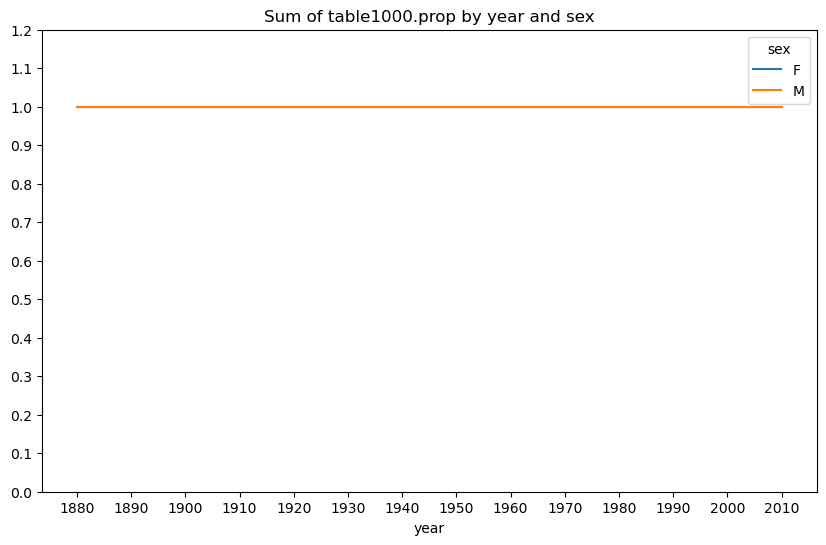

In [1203]:
table = top1000.pivot_table(values='prop', 
                            index='year', 
                            columns='sex', 
                            aggfunc='sum')
table.plot(title='Sum of table1000.prop by year and sex', 
           figsize=(10, 6), 
           yticks=np.linspace(0, 1.2, 13), 
           xticks=range(1880, 2020,10))

Declare a new dataframe for the number of distinct names (in popularity of highest to lowest) in the top 50 births per year. 

In [1206]:
df = boys[boys.year == 2010]

In [1208]:
# Preview the data
df

,year,sex,level_2,name,births,prop
1676644,2010,M,1676644,Jacob,21875,0.011523
1676645,2010,M,1676645,Ethan,17866,0.009411
1676646,2010,M,1676646,Michael,17133,0.009025
1676647,2010,M,1676647,Jayden,17030,0.008971
1676648,2010,M,1676648,William,16870,0.008887
...,...,...,...,...,...,...
1690779,2010,M,1690779,Zymaire,5,0.000003
1690780,2010,M,1690780,Zyonne,5,0.000003
1690781,2010,M,1690781,Zyquarius,5,0.000003
1690782,2010,M,1690782,Zyran,5,0.000003


Sort in descending order by coding a vectorized NumPy. We do this by taking the cumulative sum of prop and eventually setting the .searchsorted() function to 0.5: 

In [1211]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [1213]:
# Preview the data
prop_cumsum[:10]

1676644    0.011523
1676645    0.020934
1676646    0.029959
1676647    0.038930
1676648    0.047817
1676649    0.056579
1676650    0.065155
1676651    0.073414
1676652    0.081528
1676653    0.089621
Name: prop, dtype: float64

In [1215]:
prop_cumsum.values.searchsorted(0.5)

116

Compare this median point to 1990 where it was much smalller:

Compare this median point to 1990 to when the median point was much smalller: 

In [1219]:
df = boys[boys.year == 1990]

In [1221]:
in1990 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [1223]:
in1990.values.searchsorted(0.5) + 1

45

Make a function to return the count for each group. The operation should take each (year/sex) combo by fields and perform the calculation. The new dataframe (diversity) now has two time series (one for each sex indexed by year): 

In [1226]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count, include_groups=False)
diversity = diversity.unstack('sex')

In [1228]:
# Preview the data
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

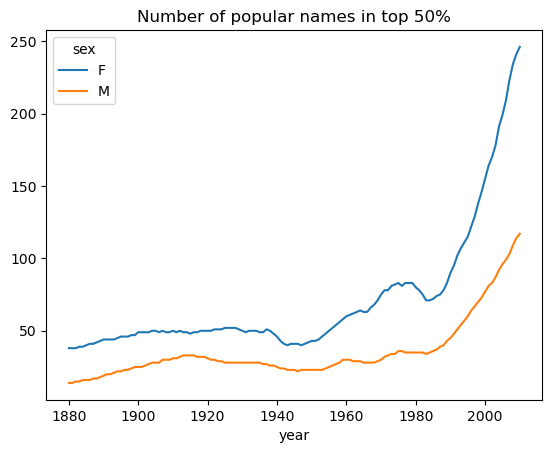

In [1229]:
diversity.plot(title="Number of popular names in top 50%")

## Analyzing the "Last-Letter"
As we in the previous graph, girls' names have always exhibited more diversity than boys'. Overall, we see that girls names became more diverse over time. Next let's analyze what is causing the diversity in names by exploring the "last-letter" revolution.

Start the analysis of the "last letter" by aggregating all births in the FULL dataset by year, sex, and final letter. Next we will extract last letter from name column. Next, we ensure we have a clean dataframe with last_letters. Make sure to completely reset the index to avoid any conflicts. Lastly we create a pivot table with clear index and column structure:

In [1288]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

names = names.assign(last_letter=last_letters)
names_reset = names.reset_index(drop=True)

table = names.pivot_table(
    values='births',
    index='last_letter',
    columns=['year', 'sex'],
    aggfunc='sum'
)

Randomly sample 3 years and print a few rows of data:

In [1293]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [1295]:
subtable.head()

year             1910               1960                2010          
sex                 F        M         F         M         F         M
last_letter                                                           
a            108376.0    977.0  691247.0    5204.0  670605.0   28438.0
b                 NaN    411.0     694.0    3912.0     450.0   38859.0
c                 5.0    482.0      49.0   15476.0     946.0   23125.0
d              6750.0  22111.0    3729.0  262112.0    2607.0   44398.0
e            133569.0  28655.0  435013.0  178823.0  313833.0  129012.0

Create a new table by normalizing the table by total births to get the proportion of total births for each sex for each ending letter: 

In [1298]:
subtable.sum()

year  sex
1910  F       396416.0
      M       194198.0
1960  F      2022062.0
      M      2132588.0
2010  F      1759010.0
      M      1898382.0
dtype: float64

In [1300]:
letter_prop = subtable / subtable.sum()

In [1302]:
letter_prop

year             1910                1960                2010          
sex                 F         M         F         M         F         M
last_letter                                                            
a            0.273390  0.005031  0.341853  0.002440  0.381240  0.014980
b                 NaN  0.002116  0.000343  0.001834  0.000256  0.020470
c            0.000013  0.002482  0.000024  0.007257  0.000538  0.012181
d            0.017028  0.113858  0.001844  0.122908  0.001482  0.023387
e            0.336941  0.147556  0.215133  0.083853  0.178415  0.067959
f                 NaN  0.000783  0.000010  0.004325  0.000055  0.001188
g            0.000144  0.002250  0.000157  0.009488  0.000374  0.001404
h            0.051529  0.045562  0.036224  0.037907  0.075852  0.051670
i            0.001526  0.000844  0.039965  0.000603  0.031734  0.022628
j                 NaN       NaN       NaN       NaN  0.000090  0.000769
k            0.000121  0.036581  0.000156  0.049384  0.000356  0.018541
l            0.043189  0.065016  0.033867  0.104904  0.026356  0.070367
m            0.001201  0.058044  0.008613  0.033827  0.002588  0.024657
n            0.079240  0.143415  0.130687  0.152522  0.140210  0.362771
o            0.001660  0.017065  0.002439  0.012829  0.001243  0.042681
p            0.000018  0.003172  0.000023  0.005675  0.000020  0.001269
q                 NaN       NaN       NaN       NaN  0.000030  0.000180
r            0.013390  0.064481  0.006764  0.031034  0.018025  0.087477
s            0.039042  0.130815  0.012764  0.102730  0.013332  0.065145
t            0.027438  0.072879  0.015201  0.065655  0.007830  0.022861
u            0.000684  0.000124  0.000574  0.000057  0.000417  0.001221
v                 NaN  0.000113  0.000060  0.000037  0.000117  0.001434
w            0.000020  0.006329  0.000031  0.007711  0.001182  0.016148
x            0.000015  0.003965  0.000037  0.001851  0.000727  0.008614
y            0.110972  0.077349  0.152569  0.160987  0.116828  0.058168
z            0.002439  0.000170  0.000659  0.000184  0.000704  0.001831

First, we create separate DataFrames for male and female using MultiIndex. We use xs, a type of cross-section, to select data for each sex. We will verify that we have the proper data by checking if both male_data and female_data is empty. Should we receive the proper output we will create a bar plot for each sex, and plot the data.

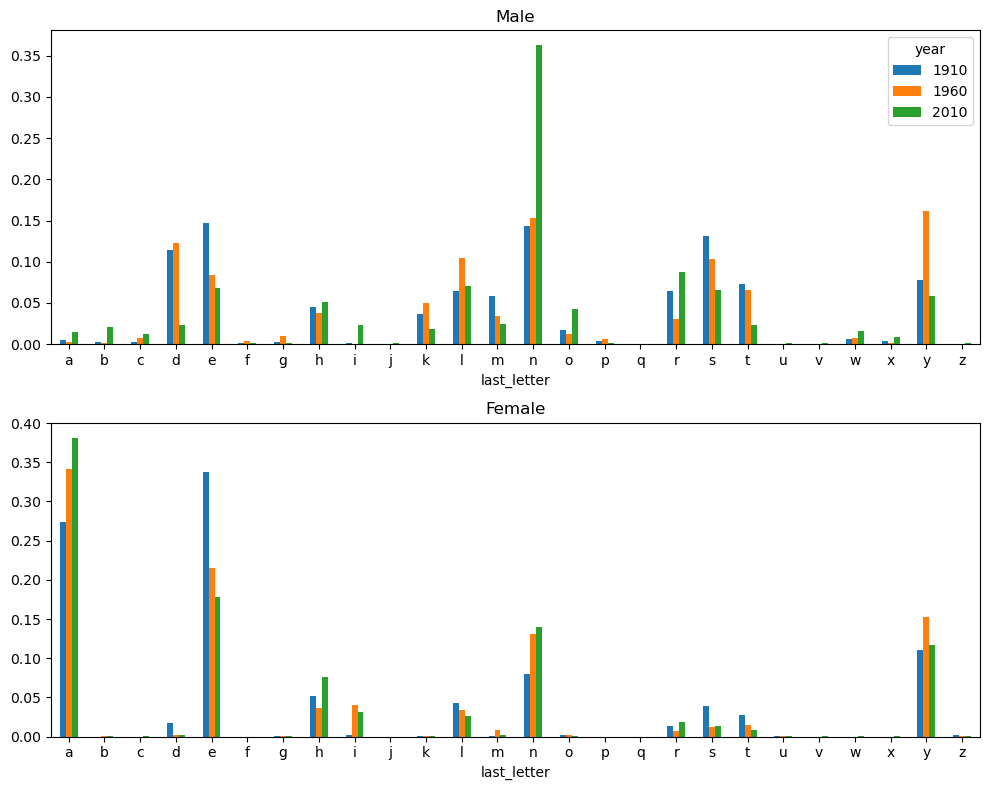

In [1313]:
# Create separate DataFrames for male and female to select data for each sex
male_data = letter_prop.xs('M', level='sex', axis=1)
female_data = letter_prop.xs('F', level='sex', axis=1)

# Verify that we have data
if male_data.empty or female_data.empty:
    print("Warning: No data found for one or both sexes. Please check your data.")

# Create a bar plot for each sex
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot data
male_data.plot(kind='bar', rot=0, ax=axes[0], title='Male')
female_data.plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

# Adjust layout to prevent overlap
plt.tight_layout()

To highlight the number of boys with a name ending, return to the full table before by normalization (by year and sex) then transpose each name ending to column for a time series:

In [1341]:
letter_prop = table / table.sum()

Next use the .xs() function to get all male data for letters 'd', 'n', 'y': 

In [1344]:
dny_ts = letter_prop.loc[['d', 'n', 'y']].xs('M', level='sex', axis=1).T

Preview the data:

In [1356]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


<Axes: xlabel='year'>

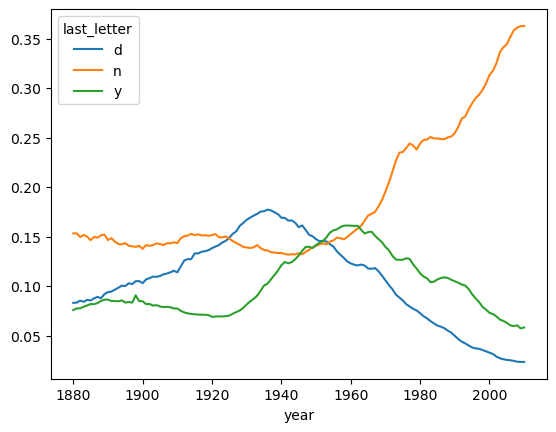

In [1358]:
dny_ts.plot()

## Boy names that became girl names (and vice versa)
Let's analyze a trend of boy names that became girl names and vise versa. Go back to the top1000 DF compute a list of names in the dataset starting with lesl: 

In [1366]:
all_names = pd.Series(top1000.name.unique())

In [1369]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]

In [1372]:
lesley_like

654          Leslie
2355         Lesley
6288       Boleslaw
6778      Boleslaus
13684         Lesly
13990        Leslye
14944        Leslee
15735     Wellesley
20649         Lesli
20850        Leslyn
21181         Lesle
21969      Lesleigh
22248        Leslea
26777     Leslieann
33317     Lesleyann
40254    Lesleyanne
41396     Leslianne
42231    Leslieanne
52964      Lesliann
58121        Leslei
61296       Leslian
63673       Lesliee
68690      Leslyann
76881        Leslly
dtype: object

Filter down to these names and sum the births grouped by those names to 
determine frquencies:

In [1381]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [1384]:
filtered.groupby('name').births.sum()

name
Boleslaus        255
Boleslaw         277
Lesle            187
Leslea           349
Leslee          4863
Leslei            52
Lesleigh         436
Lesley         37945
Lesleyann         86
Lesleyanne        80
Lesli           5473
Leslian           27
Lesliann           6
Leslianne         10
Leslie        371686
Leslieann        465
Leslieanne        93
Lesliee            8
Leslly             5
Lesly          12407
Leslyann          16
Leslye          2295
Leslyn           166
Wellesley          6
Name: births, dtype: int64

Aggregate the data by sex and year and normalize within year: 

In [1391]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')

In [1396]:
table = table.div(table.sum(1), axis=0)

In [1399]:
table.tail()

sex,F,M
year,,
2006,0.979139,0.020861
2007,0.978508,0.021492
2008,0.977437,0.022563
2009,0.971627,0.028373
2010,0.978482,0.021518


Plot the breakdown by sex over time of the proportion of male/female Lesley-like names: 

<Axes: xlabel='year'>

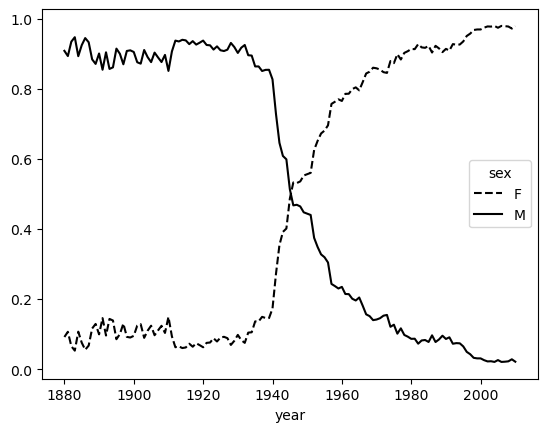

In [1403]:
table.plot(style={'M': 'k-', 'F': 'k--'})